# Model Prediksi Klaim Asuransi pada Perusahaan Asuransi Berbasis Syariah <a id='intro'></a>

Sebuah perusahaan `asuransi sosial` fiktif berbasis `syariah` bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan *machine learning*. Perusahaan ini, ingin menciptakan model yang bisa memprediksi apakah calon klien mereka sebagai `penerima manfaat asuransi` atau sebagai `donatur asuransi`. Keuntungan perusahaan diperoleh dari jasa yang ditawarkan kepada `donatur asuransi`, perusahaan ini ingin agar terciptanya keseimbangan antara `penerima manfaat asuransi` dan `donatur asuransi` sehingga operasi perusahaan tetap berjalan. Perusahaan memiliki dataset untuk melatih model berdasarkan informasi pribadi calon klien mereka seperti `gender`, `age`, `income`, `family_members`, dan	`insurance_benefits`. Beberapa tugas yang harus bisa diselesaikan oleh `model` diantaranya:

- Tugas 1: Menemukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Melakukan prediksi apakah klien baru kemungkinan akan mengambil `klaim asuransi` atau sebagai `donatur asuransi`. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Melakukan prediksi besaran `klaim asuransi` yang mungkin diterima `klien baru` menggunakan model `regresi linier`.
- Tugas 4: Melindungi `data pribadi` klien tanpa merusak model dari tugas sebelumnya. Sangatlah penting untuk mengembangkan `algoritme transformasi` data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut `penyembunyian` data atau `pengaburan data`. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun.

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Konten](#back)
* [Tahap 1. Pra-pemrosesan & Eksplorasi Data](#cont_1)
    * [1.1 Muat Data](#cont_2) 
    * [1.2 Analisis Data Eksploratif (EDA)](#cont_3)
* [Tahap 2. Klien yang Mirip](#cont_4)
    * [2.1 Membandingkan Hasil KNN Menggunakan Dataset Asli dan Dataset Skala](#cont_5) 
    * [2.2 Membandingkan Hasil KNN Menggunakan Metrik Euklides dan Manhattan](#cont_6) 
* [Tahap 3. Apakah Klien Kemungkinan Menerima Klaim Asuransi?](#cont_7)
    * [3.1 Random Generator](#cont_8) 
    * [3.2 KNN Menggunakan Dataset Asli](#cont_9) 
    * [3.3 KNN Menggunakan Dataset Skala](#cont_10)
* [Tahap 4. Besaran Klaim Asuransi yang Didapat (Regresi Linier)](#cont_11)
    * [4.1 Regresi Linier Menggunakan Dataset Asli](#cont_12) 
    * [4.2 Regresi Linier Menggunakan Dataset Skala](#cont_13) 
* [Tahap 5. Pengaburan Data](#cont_14)
* [Tahap 6. Uji Regresi Linear dengan Pengaburan Data](#cont_15)
    * [6.1 Skor RMSE dan R2 Menggunakan Fitur Asli](#cont_16) 
    * [6.2 Skor RMSE dan R2 Menggunakan Fitur Transformasi](#cont_17) 
* [Tahap 7. Kesimpulan](#cont_18)

# Pra-pemrosesan & Eksplorasi Data <a id='cont_1'></a>

## Inisialisasi

Dataset yang digunakan berasal dari `insurance_us.csv`. Dataset ini bukan merupakan dataset asli dari perusahaan asuransi syariah dan ini hanya sebuah latihan analisis.

In [1]:
# memuat modul
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import display
import warnings

sns.set_theme(palette='bright')
warnings.filterwarnings("ignore")

## Muat Data <a id='cont_2'></a>

Kita akan memuat data dan melakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [2]:
# memuat dataset
try:
    df = pd.read_csv('insurance_us.csv')
except:
    df = pd.read_csv('/datasets/insurance_us.csv')

Selanjutnya, mengganti nama kolom untuk membuat kode terlihat lebih konsisten dengan gayanya.

In [3]:
# mengubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
# menampilkan sampel dataset
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4899,0,21.0,59900.0,1,0
4048,0,23.0,41600.0,0,0
2621,0,31.0,29400.0,2,0
2590,0,38.0,40200.0,0,0
2134,0,35.0,30100.0,0,0
74,1,24.0,47000.0,3,0
1579,1,38.0,52900.0,2,0
4483,1,29.0,40700.0,0,0
3120,0,40.0,34100.0,1,0
899,0,36.0,34600.0,3,0


Dataset ini berisi beberapa kolom/variabel seperti:
- `gender` merupakan jenis kelamin
- `age`  merupakan usia klien
- `income` merupakan besaran gaji
- `family_members` merupakan jumlah anggota keluarga
- `insurance_benefits` merupakan besaran klaim asuransi yang didapat

In [5]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Dari sini bisa kita lihat bahwa kita tidak memiliki `nilai yang hilang` pada dataset. Keseluruhan dataset berisi tipe data `numeric`, namun untuk kolom `age` kurang relevan jika menggunakan tipe data `float`. Mari kita ubah agar menjadi tipe data `integer`.

In [6]:
# mengubah tipe data kolom `age` menjadi `integer`
df.age = df.age.astype('int')

In [7]:
# mengecek kembali tipe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int32  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


In [8]:
# mengamati data menggunakan statistika deskriptif
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Dari informasi statistika deskriptif terhilat bahwa dataset yang kita punya tidak memiliki `outlier` sehingga aman untuk diproses lebih lanjut.

In [9]:
# mengecek duplikasi data
df.duplicated().sum()

153

Disini kita memiliki `duplikasi data` sebanyak `153` akan tetapi kita tidak akan menghapusnya dikarenakan kita tidak tahu apakah itu merupakan `ID yang sama` atau bisa saja kebetulan datanya sama namun `ID-nya berbeda`.

## Analisis Data Eksploratif (EDA) <a id='cont_3'></a>

Mari kita periksa dengan cepat, apakah ada kelompok pelanggan tertentu dengan melihat plot pasangan?

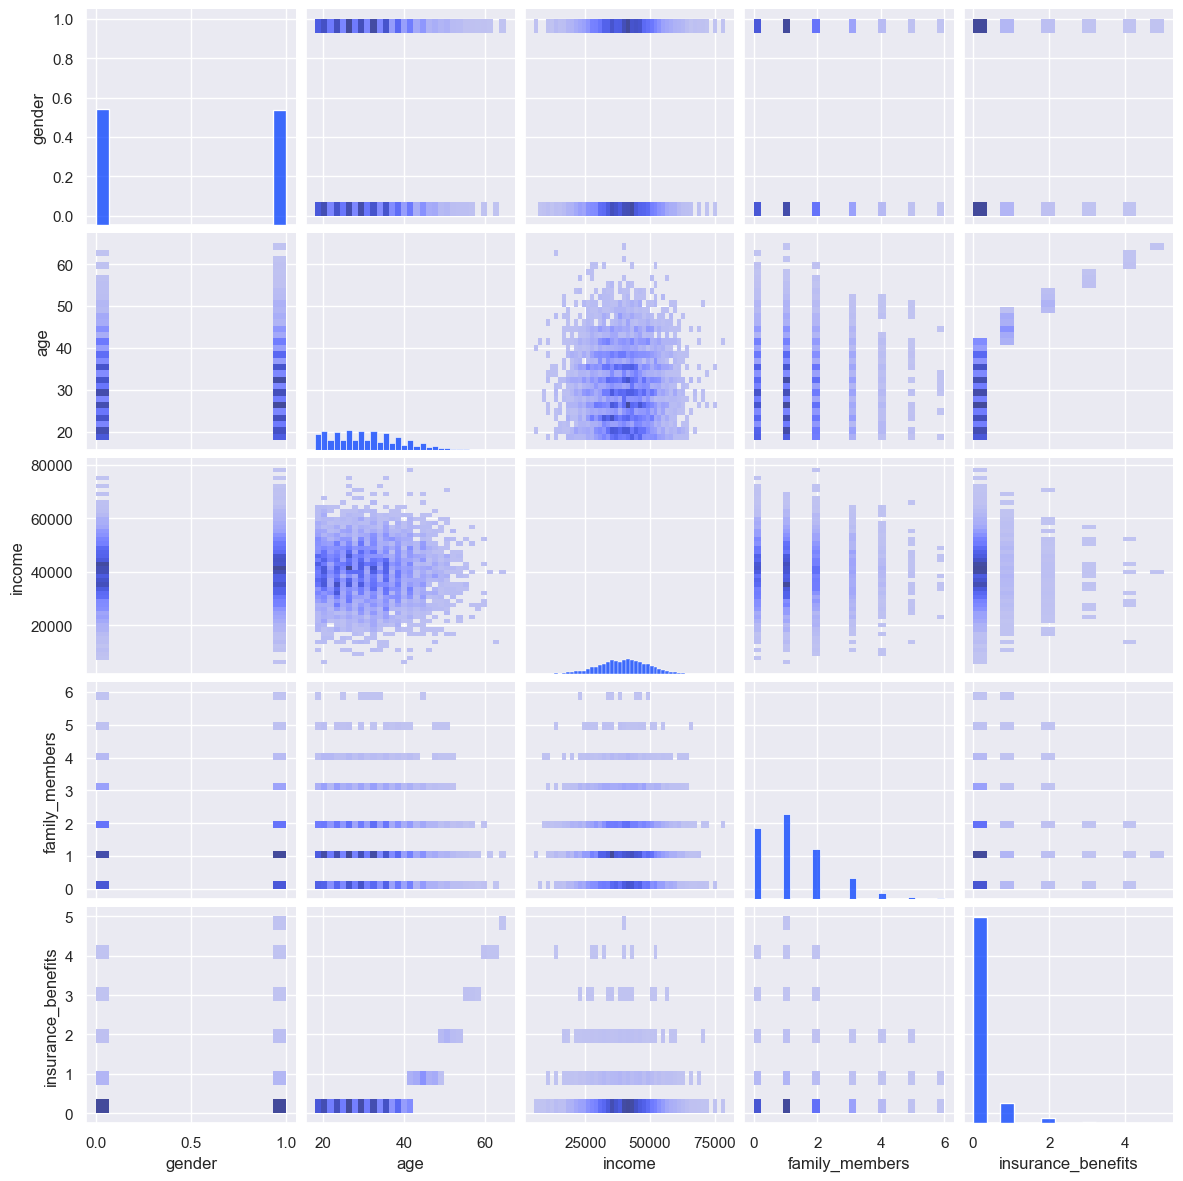

In [10]:
# melakukan visualisasi dataset menggunakan `pairplot`
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Baiklah, sepertinya agak sulit untuk melihat kelompok (klaster) yang jelas mengingat sulitnya menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). Namun, itulah gunanya `Linear Algebra` dan `Machine Learning` di sini.

Apakah ada korelasi antara masing-masing kolom? kita akan melihatnya menggunakan tabel korelasi berikut.

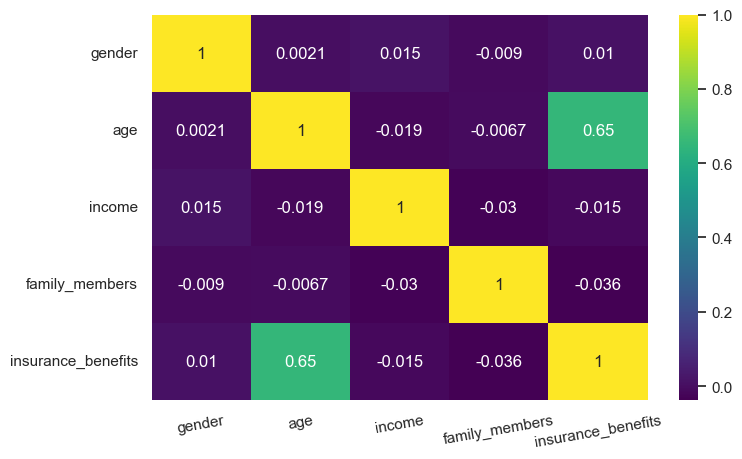

In [11]:
# mengecek korelasi menggunakan tabel korelasi
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(rotation=10)
plt.show()

Dari sini bisa kita lihat target `insurance_benefit` memiliki korelasi yang kuat dengan `age` sedangkan untuk korelasi antar fitur tidak ada sehingga aman dari `kolinearitas`.

# Tugas 1. Klien yang Mirip <a id='cont_4'></a>

Dalam bahasa pemrograman `Machine Learning`, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek. Kita akan membandingkan hasil *k-nearest neighbors* dengan menggunakan dua tipe pengukuran jarak diantaranya:

- Jarak Antar Vektor -> Jarak Euklides
- Jarak Antar Vektor -> Jarak Manhattan

Kita akan membuat sebuah fungsi yang menampilkan *k-nearest neighbors* terdekat untuk objek ke-*n* berdasarkan metrik jarak tertentu. Menguji algoritme *k-nearest neighbors* untuk empat kombinasi dari dua kasus berikut:
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan `MaxAbsScaler`
- Metrik Jarak
  - Euklides
  - Manhattan

In [12]:
# nama-nama fitur
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
# fungsi untuk menghitung jarak lokasi terhadap k-tetangga terdekat
def get_knn(df, n, k, metric):
    """
    Menampilkan k nearest neighbors
    :param df: DataFrame Pandas digunakan untuk menemukan objek-objek yang mirip di dalamnya
    :param n: nomor objek yang dicari k nearest neighbors
    :param k: jumlah k nearest neighbors yang ditampilkan
    :param metric: nama metrik jarak
    """

    nbrs = sklearn.neighbors.NearestNeighbors(metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Selanjutnya kita akan melakukan `feature enginering` yaitu `scaling` menggunakan `MaxAbsScaler` dan buat menjadi dataset baru secara terpisah.

In [14]:
# melakukan scaling pada data asli serta menjadikanya sebagai dataset baru
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
# menampilkan sampel dataset yang sudah dilakukan scaling
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2470,0,0.523077,0.505063,0.000000,0
128,0,0.307692,0.498734,0.166667,0
1588,0,0.538462,0.556962,0.166667,0
3989,1,0.292308,0.618987,0.333333,0
2066,0,0.292308,0.507595,0.166667,0


Sekarang, mari kita mulai dapatkan catatan yang mirip untuk setiap kombinasi yang ada.

### Membandingkan Hasil KNN Menggunakan Dataset Asli dan Dataset Skala <a id='cont_5'></a>

In [16]:
# hasil KNN menggunakan dataset asli
without_scale = get_knn(df=df,n=100,k=5,metric='euclidean')
without_scale

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300.0,1,0,0.000000
4278,1,19,37300.0,2,0,1.414214
2624,1,19,37300.0,0,0,1.414214
1831,0,20,37300.0,2,0,1.414214
1086,0,22,37300.0,3,0,3.605551


In [17]:
# hasil KNN menggunakan dataset skala
with_scale = get_knn(df=df_scaled,n=100,k=5,metric='euclidean')
with_scale

,gender,age,income,family_members,insurance_benefits,distance
100,0,0.292308,0.472152,0.166667,0,0.000000
4915,0,0.292308,0.477215,0.166667,0,0.005063
243,0,0.292308,0.467089,0.166667,0,0.005063
1323,0,0.292308,0.456962,0.166667,0,0.015190
811,0,0.307692,0.470886,0.166667,0,0.015437


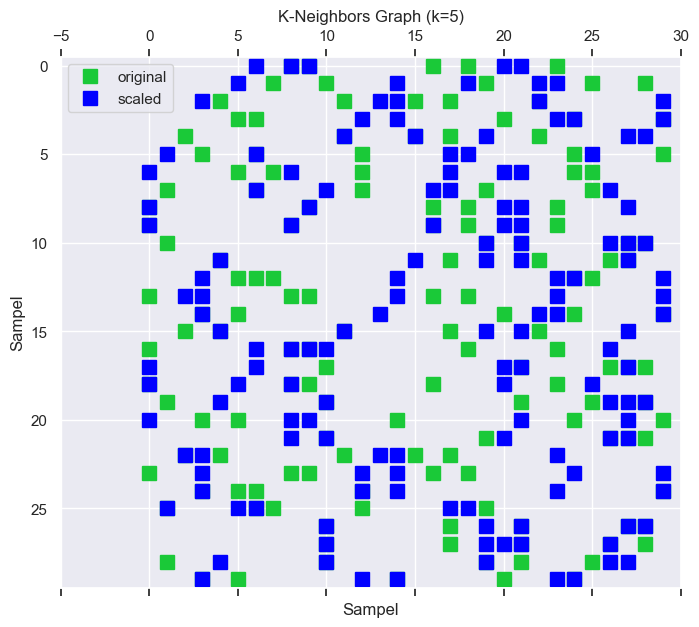

In [18]:
# visualisasi bentuk k-nearest neighbor untuk dataset original dan dataset scaled
k = 5
n = 30
graph_ori = kneighbors_graph(df.head(n).to_numpy(),n_neighbors=k,mode='distance')
graph_scale = kneighbors_graph(df_scaled.head(n).to_numpy(),n_neighbors=k,mode='distance')
plt.figure(figsize=(8, 8))
plt.spy(graph_ori, markersize=10,c='g',label='original')
plt.spy(graph_scale, markersize=10,c='blue',label='scaled')
plt.title(f'K-Neighbors Graph (k={k})')
plt.xlabel('Sampel')
plt.ylabel('Sampel')
plt.legend()
plt.xlim(-5,n)
plt.show()

Dari hasil perhitungan menggunakan `metric euklides` antara dataset `original` dan dataset `scaling`, bahwa pada dataset `scaling` memberikan jarak yang lebih dekat jika dibandingkan dengan dataset `original`. Visualiasi juga mendukung dimana untuk dataset `scaling`, data lebih sering berkumpul dan jaraknya pendek jika dibandingkan dengan dataset `original`. 

### Membandingkan Hasil KNN Menggunakan Metrik Euklides dan Manhattan <a id='cont_6'></a>

In [19]:
# KNN menggunakan metrik `euklides`
euclidean = get_knn(df=df_scaled,n=100,k=5,metric='euclidean')
euclidean

,gender,age,income,family_members,insurance_benefits,distance
100,0,0.292308,0.472152,0.166667,0,0.000000
4915,0,0.292308,0.477215,0.166667,0,0.005063
243,0,0.292308,0.467089,0.166667,0,0.005063
1323,0,0.292308,0.456962,0.166667,0,0.015190
811,0,0.307692,0.470886,0.166667,0,0.015437


In [20]:
# KNN menggunakan metrik `manhattan`
manhattan = get_knn(df=df_scaled,n=100,k=5,metric='manhattan')
manhattan

,gender,age,income,family_members,insurance_benefits,distance
100,0,0.292308,0.472152,0.166667,0,0.000000
4915,0,0.292308,0.477215,0.166667,0,0.005063
243,0,0.292308,0.467089,0.166667,0,0.005063
1323,0,0.292308,0.456962,0.166667,0,0.015190
811,0,0.307692,0.470886,0.166667,0,0.016650


Dari hasil perhitungan jarak, tidak ada perbedaan bahkan sama persis jika menggunakan metrik `euklides` maupun metrik `manhattan`.

# Tugas 2. Apakah Klien Kemungkinan Menerima Klaim Asuransi? <a id='cont_7'></a>

Untuk menentukan klien `menerima klaim asuransi` atau `tidak menerima klaim asuransi`, kita perlu mengelompokanya menjadi dua kelas. `Kelas-1` adalah kelas `penerima klaim asuransi` sedangkan `kelas-0` adalah kelas `bukan penerima asuransi`. Tugas ini mirip dengan klasifikasi biner (*binary classification*). Disini kita akan melakukan beberapa rangkaian untuk melatih `model machine learning` beserta kualitasnya:
- Membuat kolom tambahan yang berisi `kelompok penerima asuransi (kelas-1)` dan `kelompok bukan penerima asuransi (kelas-0)`.
- Membuat model `dummy` yang hasil prediksinya berdasarkan angka acak dari `BitGenerator (PCG64)` untuk angka `binomial` berdasarkan `pobabilitas`. Model `dummy` harusnya menampilkan `1` dengan beberapa `probabilitas`. Mari kita uji model dengan empat nilai probabilitas: `0, probabilitas klaim asuransi yang diterima; 0,5; 1`.

    Probabilitas klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}
$$

- Membuat model *k-Nearest Neighbor* dengan jumlah `k=1,...,10` untuk melatih dan menguji dataset. Dataset yang kita uji adalah `dataset asli` dan `dataset skala`.
- Dataset dipisah menjadi 70:30 untuk proporsi *training* dan *test set*.
- Skor metrik yang digunakan melihat kualitas model adalah `F1 Score` serta menampilkan `confusion matrix`nya.

In [21]:
# membuat kolom klasifikasi biner untuk penerima asuransi dan bukan penerima asuransi
df['insurance_benefits_received'] = df['insurance_benefits'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
# memeriksa keseimbangkan kelas penerima asuransi dan bukan penerima asuransi
df.insurance_benefits_received.value_counts()

insurance_benefits_received
0    4436
1     564
Name: count, dtype: int64

In [23]:
# fungsi untuk menghitung F1 skor dan confusion matrix
def eval_classifier(y_true, y_pred):   
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriks Kesalahan')
    print(cm)

In [24]:
# fungsi untuk menghasilkan output dari model acak menggunakan random generator untuk binomial_number
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

### Random Generator <a id='cont_8'></a>

In [25]:
# menghitung F1 skor dan Confusion Matrix menggunakan model `dummy`
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P,size=len(df))
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

Probabilitasnya: 0.00
F1: 0.00
Matriks Kesalahan
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probabilitasnya: 0.11
F1: 0.12
Matriks Kesalahan
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probabilitasnya: 0.50
F1: 0.20
Matriks Kesalahan
[[0.456  0.4312]
 [0.053  0.0598]]

Probabilitasnya: 1.00
F1: 0.20
Matriks Kesalahan
[[0.     0.8872]
 [0.     0.1128]]



### KNN Menggunakan Dataset Asli <a id='cont_9'></a>

In [26]:
# membagi dataset menjadi train dan test beserta porsinya
X1 = df.drop('insurance_benefits_received',axis=1)
y1 = df.insurance_benefits_received
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, stratify=y1, test_size=0.3)

In [27]:
# menghitung F1 Skor dan confusion matrix dengan k[1~10]
for k in range(1,11):
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance')
    KNN.fit(X1_train,y1_train)
    y_pred_knn = KNN.predict(X1_test)
    print('K:',k)
    eval_classifier(y1_test, y_pred_knn)
    print()

K: 1
F1: 0.60
Matriks Kesalahan
[[0.87266667 0.01466667]
 [0.058      0.05466667]]

K: 2
F1: 0.60
Matriks Kesalahan
[[0.87266667 0.01466667]
 [0.058      0.05466667]]

K: 3
F1: 0.54
Matriks Kesalahan
[[0.876      0.01133333]
 [0.06733333 0.04533333]]

K: 4
F1: 0.53
Matriks Kesalahan
[[0.87866667 0.00866667]
 [0.06866667 0.044     ]]

K: 5
F1: 0.49
Matriks Kesalahan
[[0.878      0.00933333]
 [0.07266667 0.04      ]]

K: 6
F1: 0.49
Matriks Kesalahan
[[0.87933333 0.008     ]
 [0.07333333 0.03933333]]

K: 7
F1: 0.46
Matriks Kesalahan
[[0.88       0.00733333]
 [0.07666667 0.036     ]]

K: 8
F1: 0.43
Matriks Kesalahan
[[0.88       0.00733333]
 [0.07933333 0.03333333]]

K: 9
F1: 0.41
Matriks Kesalahan
[[0.88       0.00733333]
 [0.082      0.03066667]]

K: 10
F1: 0.39
Matriks Kesalahan
[[0.88066667 0.00666667]
 [0.08333333 0.02933333]]



### KNN Menggunakan Dataset Skala <a id='cont_10'></a>

In [28]:
# membagi dataset menjadi train dan test beserta porsinya
df_scaled['insurance_benefits_received'] = df_scaled['insurance_benefits'].apply(lambda x: 1 if x > 0 else 0)
X2 = df_scaled.drop('insurance_benefits_received',axis=1)
y2 = df_scaled.insurance_benefits_received
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, stratify=y2, test_size=0.3)

In [29]:
# menghitung F1 Skor dan confusion matrix dengan k[1~10]
for k in range(1,11):
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10,weights='distance')
    KNN.fit(X2_train,y2_train)
    y_pred_knn = KNN.predict(X2_test)
    print('K:',k)
    eval_classifier(y2_test, y_pred_knn)
    print()

K: 1
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 2
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 3
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 4
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 5
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 6
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 7
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 8
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 9
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]

K: 10
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]



Rangkuman:
* Model `KNN Classifier` memberikan hasil `F1 Score` yang lebih baik jika dibandingkan dengan menggunakan model `dummy`.
* Dataset `scaling` memberikan hasil `F1 Score` yang lebih baik dibandingkan dengan dataset `original`. 
* Semakin banyak jumlah `k-neighbors` semakin rendah `F1 Score` pada dataset `original` sedangkan pada dataset `scaling` tidak berpengaruh terhadap jumlah `k-neighbors`.

# Tugas 3. Besaran Klaim Asuransi yang Didapat (Regresi Linier) <a id='cont_11'></a>

Disini kita akan melakukan `prediksi` serta menghitung skor dari model regresi linier menggunakan `RMSE score` dan `R2 Score`. Selain itu, kita akan mencoba membuat `model regresi linier` secara mandiri dengan menggunakan `Linear Algebra` dan menampilkan `weight`nya. Dengan `insurance_benefit` sebagai target, kita akan mengetahui `RMSE` dan `R2` untuk model `regresi linier` yang kita buat untuk `dataset asli` maupun `dataset skala`. Berikut merupakan langkah-langkah untuk membuat model regresi linier:

Variabel-variabel:
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari satuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Sepertinya ada solusi analitis untuk masalah di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi:

$$
\hat{y} = X_{val}w
$$

In [30]:
# membuat model regresi linier
class MyLinearRegression:
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        w = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.weights = w[1:]
        self.weights_0 = w[0]

    def predict(self, X):
        # menambahkan satuan
        X2 = X
        y_pred = X2.dot(self.weights) + self.weights_0
        return y_pred

In [31]:
# fungsi untuk menghitung RMSE dan R2
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

### Regresi Linier Menggunakan Dataset Asli <a id='cont_12'></a>

Selanjutnya, memisahkan keseluruhan data menjadi *training set* dan *validation set* dengan proporsi `70:30`. Terakhir evaluasi model menggunakan `RMSE score` dan `R2 score`.

In [32]:
# menghitung skor RMSE dan R2 menggunakan dataset asli
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.57495491e-02  1.64272726e-02 -2.60743659e-07 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


### Regresi Linier Menggunakan Dataset Skala <a id='cont_13'></a>

In [33]:
# menghitung skor RMSE dan R2 menggunakan dataset skala
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


Dari hasil perhitungan menunjukan bahwa skor `RMSE` dan `R2` tidak berpengaruh terhadap model `regresi linier` untuk dataset `original` maupun `scaling`. Untuk nilai `predictors/weight` menunjukan perbedaan jika menggunakan dataset `original` atau dataset `scaling`.

# Tugas 4. Pengaburan Data <a id='cont_14'></a>

Disini kita akan melakukan penjagaan terhadap data dengan cara mengaburkanya, sehingga tidak memiliki makna sesungguhnya. Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

Pastikan matriks $P$ bersifat *invertible* yaitu jika matriks $P$ dikalikan dengan matriks inversnya $P'$ akan menjadi matriks *identitas*. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan bahwa $P$ bersifat *invertible*. Setelah sudah dipastikan bahwa matriks $P$ *invertible*, kita bisa melakukan transformasi fitur.

In [34]:
# mengelompokan fitur
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [35]:
# mengubah dataset menjadi numpy array
X = df_pn.to_numpy()

Membuat matriks acak $P$.

In [36]:
# membuat matriks acak P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Memeriksa apakah matriks $P$ *invertible*

In [37]:
# memeriksa matriks P invertible atau tidak
inv_P = np.linalg.inv(P)
I = np.around(P.dot(inv_P))
I

array([[ 1.,  0., -0., -0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  1., -0.],
       [-0., -0., -0.,  1.]])

Terlihat hasil perkalian matriks `P` dengan inversnya menghasilkan matriks `Identitas`.

Kita akan mencoba menebak usia klien atau pendapatanya setelah dilakukan transformasi seperti berikut:

In [38]:
# mengambil sampel dataset
client = df.iloc[0,:-2].to_numpy().reshape(1,-1)
pd.DataFrame(client,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0


In [39]:
# mentransformasikan dataset menggunakan matriks P
client_transform = client.dot(P)
pd.DataFrame(client_transform,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.69669


Selanjutnya, kita akan mencoba memulihkan fitur yang sudah ditransformasi $X'$, jika $P$ sudah diketahui. Kita bisa mengalikanya kembali dengan invers matriks $P'$ dengan $X'$ untuk mengembalikan fitur asli seperti semula.

In [40]:
# mengembalikan nilai semula dari hasil transformasi
client_reverse = client_transform.dot(inv_P)
pd.DataFrame(client_reverse,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0


Disini kita akan mencoba jumlah sampel yang lebih banyak:
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [41]:
# mengambil beberapa sampel dataset
pd.DataFrame(X,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


In [42]:
# mentransformasikan dataset menggunakan matriks P
X_trans = X.dot(P)
pd.DataFrame(X_trans,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [43]:
# mengembalikan nilai semula dari hasil transformasi
X_reverse = X_trans.dot(inv_P)
pd.DataFrame(X_reverse,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,1.679528e-12,46.0,38000.0,1.000000e+00
2,-6.230214e-13,29.0,21000.0,-2.030327e-13
3,-1.089078e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.524242e-12


Dari hasil menunjukan bahwa kita bisa melakukan transformasi fitur menggunakan matriks $P$ dan mengembalikanya kesemula dari hasil transformasi dengan syarat matriks $P$ *invertible*. Hasil terlihat tidak menunjukan sama persis dikarenakan invers $P$ menghasilkan bilangan pecahan yang sangat kecil.

##  Pengaburan Data Bisa Bekerja dengan Model Regresi Linier 

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linier. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linier - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya.

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Kita akan menghubungkan $w$ dan $w_P$ jika menyederhanakan rumus untuk $w_P$ di atas seperti berikut:

Hubungan antara $w$ dengan $w_P$:
$$
w_P = \frac{w}{P}
$$
Proses transformasi dataset tidak mempengaruhi perhitungan skor `RMSE` atau `R2`.

**Bukti analitis**

$$
\begin{aligned}
w_P &= [(XP)^T XP]^{-1} (XP)^Ty\\
w_P &= [X^TP^TXP]^{-1} X^TP^Ty\\
w_P &= [X^TX]^{-1}[P^TP]^{-1} X^TP^Ty\\
w_P &= [P^TP]^{-1}P^T[X^TX]^{-1}X^Ty\\
w_P &= \frac{P^T}{P^TP}[X^T X]^{-1} X^T y\\
w_P &= \frac{1}{P}[X^T X]^{-1} X^T y\\
\end{aligned}
$$
Jika $w = [X^T X]^{-1} X^T y$, maka $w_P$ akan menjadi:
$$
w_P = \frac{w}{P}
$$
Jika $w_P$ dimasukan kedalam RMSE akan menjadi:
$$
\begin{aligned}
w_p &= \frac{y}{X_{(p)}} \\[4ex]
\hat{y} &= X_{val(p)}w_p\\[2ex]
RMSE &= \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}\\[5ex]
RMSE &= \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_{i(w_P)} - \hat{y}_{i(w_P)})^2}
\end{aligned}
$$
`RMSE` tidak akan berpengaruh karena hanya menghitung selisih hasil `true` $y_i$ dan hasil `predict` $\hat{y}_i$ berdasarkan data yang sudah ditransformasikan $P$.

# Uji Regresi Linear dengan Pengaburan Data <a id='cont_15'></a>

Apakah benar dengan `pengaburan data` kita bisa membuat skor `model tetap sama` dengan `tanpa pengaburan data`? Mari kita buktikan kalau `Regresi Linier` dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih. Berikut ini merupakan langkah-langkah pembuktian:

- Membuat matriks persegi $P$ dari angka acak.
- Memeriksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- Membagi dataset menjadi fitur dan target.
- Menggunakan fitur yang sudah ditransformasi $XP$ sebagai matriks fitur baru.
- Melakukan pengujian skor `RMSE` dan `R2` linier regresi untuk fitur asli dan fitur transformasi.

### Matriks Acak

Membuat matriks acak $P_{new}$.

In [44]:
# membuat matriks acak
P_new = np.random.randint(1,20,(X.shape[1], X.shape[1]))
P_new

array([[19, 10,  3, 11],
       [ 5,  4, 13,  7],
       [12, 15, 10, 14],
       [14,  1, 18, 14]])

In [45]:
# pengujian matriks acak apakah invertible atau tidak
inv_P_new = np.linalg.inv(P_new)
I = np.around(P_new.dot(inv_P_new))
I

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1., -0., -0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

Matriks acak $P_{new}$ merupakan matriks *invertible*.

### Skor RMSE dan R2 Menggunakan Fitur Asli <a id='cont_16'></a>

In [46]:
# menghitung skor RMSE dan R2 menggunakan fitur asli
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.57495491e-02  1.64272726e-02 -2.60743659e-07 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


### Skor RMSE dan R2 Menggunakan Fitur Transformasi <a id='cont_17'></a>

In [47]:
# transformasi fitur
X_transform = X.dot(P_new)
X_transform

array([[595998., 744415., 496154., 694872.],
       [456888., 570461., 380156., 532520.],
       [252551., 315290., 210087., 294319.],
       ...,
       [407208., 508702., 339096., 474848.],
       [392865., 490727., 327133., 458091.],
       [487751., 609285., 406115., 568729.]])

In [48]:
# menghitung skor RMSE dan R2 menggunakan fitur transformasi
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 0.00716143  0.00472391  0.00501525 -0.01478204]
RMSE: 0.34
R2: 0.66


Hasil menunjukan bahwa setelah dilakukan transformasi pada fitur menggunakan matriks acak `P` yang invertible, tidak ada perbedaan skor `RMSE` dan `R2` baik untuk `fitur asli` maupun `fitur transformasi`.

# Kesimpulan <a id='cont_18'></a>

Projek ini merupakan kombinasi antara `kasus klasifikasi` dan `kasus regresi` dimana kita akan mengetahui beberapa parameter yang berpengaruh terhadap skor seperti pada `kasus klasifikasi`, metrik `F1 skor` terhadap parameter model `K-Nearest Neighbor`. Pada `kasus regresi` kita melakukan pengaburan fitur dimana fitur ditransformasikan menggunakan matriks `P` yang invertible apakah akan mempengaruhi skor `RMSE` dan `R2`. Kita juga melakukan `reverse fitur` untuk mengembalikan nilai sesungguhnya dari `transform fitur`. Beberapa kesimpulan dirangkum sebagai berikut:
- Perhitungan menggunakan `metrik euklides` antara dataset `original` dan dataset `scaling`, bahwa pada dataset `scaling` memberikan jarak yang lebih dekat jika dibandingkan dengan dataset `original`. Visualiasi juga mendukung dimana untuk dataset `scaling`, data lebih sering berkumpul dan jaraknya pendek jika dibandingkan dengan dataset `original`. 
- Tidak ada perbedaan jarak `(distance)` bahkan sama persis jika menggunakan metrik `euklides` maupun metrik `manhattan`.
- Model `KNN Classifier` memberikan hasil `F1 Score` yang lebih baik jika dibandingkan dengan menggunakan model `dummy`.
- Dataset `scaling` memberikan hasil `F1 Score` yang lebih baik dibandingkan dengan dataset `original`. 
- Semakin banyak jumlah `k-neighbors` semakin rendah `F1 Score` pada dataset `original` sedangkan pada dataset `scaling` tidak berpengaruh terhadap jumlah `k-neighbors`.
- Skor `RMSE` dan `R2` tidak berpengaruh terhadap model `regresi linier` untuk dataset `original` maupun `scaling`. Untuk nilai `predictors/weight` menunjukan perbedaan jika menggunakan dataset `original` atau dataset `scaling`.
- Dari hasil menunjukan bahwa kita bisa melakukan transformasi fitur menggunakan matriks `P` dan mengembalikanya kesemula dari hasil transformasi dengan syarat matriks `P` invertible.
- Proses transformasi pada fitur menggunakan matriks acak `P` yang invertible, tidak ada perbedaan skor `RMSE` dan `R2` baik untuk `fitur asli` maupun `fitur transformasi`.